In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df = df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
280,59,88000,1
387,39,71000,0
82,20,49000,0
193,19,70000,0
209,46,22000,0


### Split train-test data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.drop('Purchased',axis=1), df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

### Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Only the train data will be fitted and then it will learn the parameter
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) # Returns an array not dataframe
X_test_scaled = scaler.transform(X_test)

In [15]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [17]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns) 
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [18]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


### Effect of scaling

Text(0.5, 1.0, 'After Scaling')

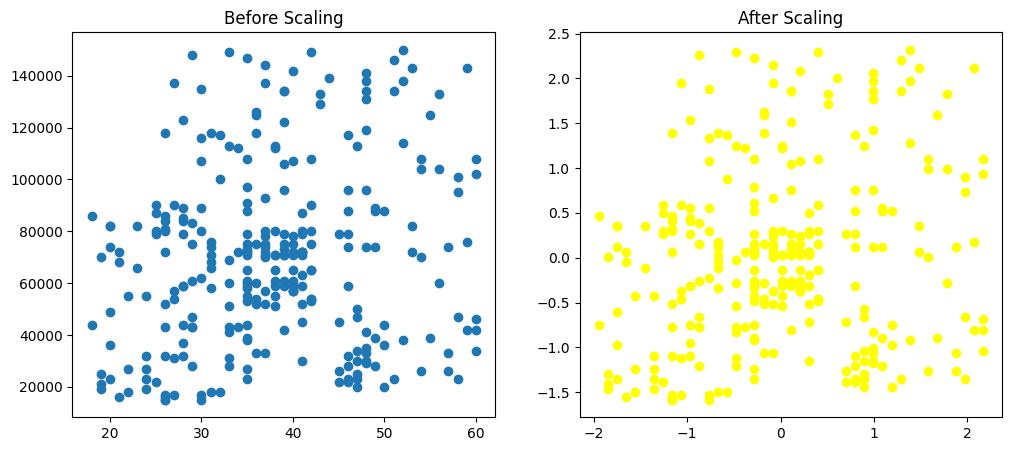

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='yellow')
ax2.set_title('After Scaling')